In [25]:
from excel_pandas.libro import LibroPandas
from excel_pandas.hoja import HojaPandas
import pandas as pd

var = "humedad"
start = "2024-01-01 12:00:00"
stop = "2024-01-01 13:00:00"

In [26]:

libro_csv = LibroPandas("DatosImportados")


libro_csv.agregar_hoja_desde_archivo("data/sensor_ground.xlsx", hojas="1")
libro_csv.agregar_hoja_desde_archivo("data/sensor_under_test_lag.xlsx",hojas="1")


for nombre, hoja in libro_csv.hojas.items():
    print(f" Hoja: {nombre} — {len(hoja)} filas")


 Hoja: Signal — 1000 filas
 Hoja: SignalLag — 1000 filas


In [27]:
print(libro_csv)

 Libro: DatosImportados, hojas: ['Signal', 'SignalLag']


In [28]:
libro_csv.hojas["Signal"]

,timestamp,temperatura,humedad
0,2024-01-01 12:00:00,24.488550,60.902658
1,2024-01-01 12:01:00,26.297781,58.521546
2,2024-01-01 12:02:00,25.357441,61.157813
3,2024-01-01 12:03:00,25.118314,57.828161
4,2024-01-01 12:04:00,25.848474,62.522542
...,...,...,...
995,2024-01-02 04:35:00,25.160869,61.889493
996,2024-01-02 04:36:00,25.290392,59.140791
997,2024-01-02 04:37:00,25.030028,56.972789
998,2024-01-02 04:38:00,25.439552,58.286544


In [29]:
libro_csv.hojas["SignalLag"]

,timestamp,temperatura,humedad
0,2024-01-01 12:00:00,24.510533,60.382578
1,2024-01-01 12:01:00,26.055475,57.804769
2,2024-01-01 12:02:00,25.637250,59.568381
3,2024-01-01 12:03:00,25.060100,56.817149
4,2024-01-01 12:04:00,25.674216,64.325618
...,...,...,...
995,2024-01-02 04:35:00,24.945554,62.076980
996,2024-01-02 04:36:00,25.864969,58.512328
997,2024-01-02 04:37:00,25.219380,55.944801
998,2024-01-02 04:38:00,25.474246,59.032063


In [30]:
df = libro_csv.hojas["Signal"]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')  # Necesario para usar .loc con rango de fechas
df_filtrado = df.loc[start:stop, [var]].reset_index()


In [31]:
print(df_filtrado)

 Hoja: 'Signal'
             timestamp    humedad
0  2024-01-01 12:00:00  60.902658
1  2024-01-01 12:01:00  58.521546
2  2024-01-01 12:02:00  61.157813
3  2024-01-01 12:03:00  57.828161
4  2024-01-01 12:04:00  62.522542
..                 ...        ...
56 2024-01-01 12:56:00  58.750271
57 2024-01-01 12:57:00  60.184902
58 2024-01-01 12:58:00  60.128051
59 2024-01-01 12:59:00  59.009995
60 2024-01-01 13:00:00  61.118244

[61 rows x 2 columns]


In [32]:
df_lag = libro_csv.hojas["SignalLag"]
df_lag['timestamp'] = pd.to_datetime(df_lag['timestamp'])
df_lag = df_lag.set_index('timestamp')  # Necesario para usar .loc con rango de fechas
df_lag_filtrado = df_lag.loc[start:stop, [var]].reset_index()

In [33]:
print(df_lag_filtrado)

 Hoja: 'SignalLag'
             timestamp    humedad
0  2024-01-01 12:00:00  60.382578
1  2024-01-01 12:01:00  57.804769
2  2024-01-01 12:02:00  59.568381
3  2024-01-01 12:03:00  56.817149
4  2024-01-01 12:04:00  64.325618
..                 ...        ...
56 2024-01-01 12:56:00  59.338008
57 2024-01-01 12:57:00  59.292139
58 2024-01-01 12:58:00  60.215714
59 2024-01-01 12:59:00  59.865581
60 2024-01-01 13:00:00  62.552425

[61 rows x 2 columns]


In [34]:
df_comparado = pd.merge(df_filtrado, df_lag_filtrado, on='timestamp', how='inner')
print(df_comparado)


 Hoja: 'Signal'
             timestamp  humedad_x  humedad_y
0  2024-01-01 12:00:00  60.902658  60.382578
1  2024-01-01 12:01:00  58.521546  57.804769
2  2024-01-01 12:02:00  61.157813  59.568381
3  2024-01-01 12:03:00  57.828161  56.817149
4  2024-01-01 12:04:00  62.522542  64.325618
..                 ...        ...        ...
56 2024-01-01 12:56:00  58.750271  59.338008
57 2024-01-01 12:57:00  60.184902  59.292139
58 2024-01-01 12:58:00  60.128051  60.215714
59 2024-01-01 12:59:00  59.009995  59.865581
60 2024-01-01 13:00:00  61.118244  62.552425

[61 rows x 3 columns]


In [35]:
col_x = df_comparado.columns[1]
col_y = df_comparado.columns[2]
print(df_comparado[[col_x, col_y]].describe())


       humedad_x  humedad_y
count  61.000000  61.000000
mean   59.906675  60.012672
std     1.704194   2.128096
min    56.751096  55.700527
25%    58.521546  58.676761
50%    59.925419  60.094824
75%    61.118244  61.030758
max    64.335142  66.109836


In [36]:

df_comparado['error_abs'] = (df_comparado[col_x] - df_comparado[col_y]).abs()

df_comparado['error_cuad'] = (df_comparado[col_x] - df_comparado[col_y])**2


mae = df_comparado['error_abs'].mean()
rmse = (df_comparado['error_cuad'].mean())**0.5

print(f"MAE (Error absoluto medio): {mae:.4f} °C")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.4f} °C")


MAE (Error absoluto medio): 0.8609 °C
RMSE (Raíz del error cuadrático medio): 1.0617 °C


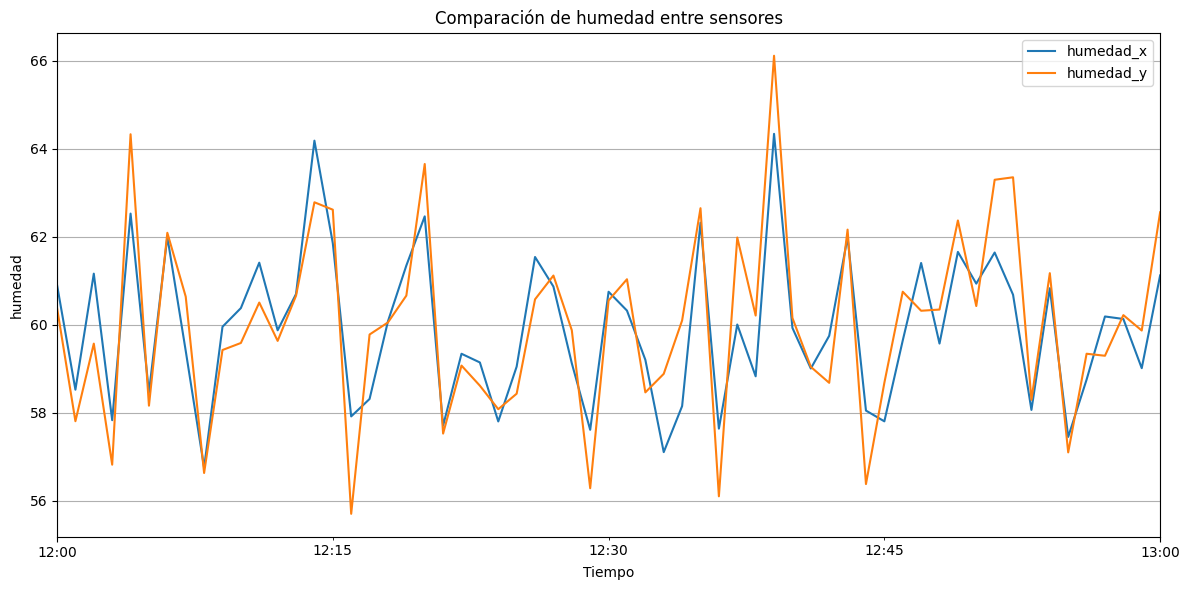

In [37]:
import matplotlib.pyplot as plt

df_comparado.plot(
    x='timestamp',
    y=[col_x, col_y],
    figsize=(12, 6),
    title='Comparación de '+ var + ' entre sensores'
)

plt.xlabel("Tiempo")
plt.ylabel(var)
plt.grid(True)
plt.tight_layout()
plt.show()



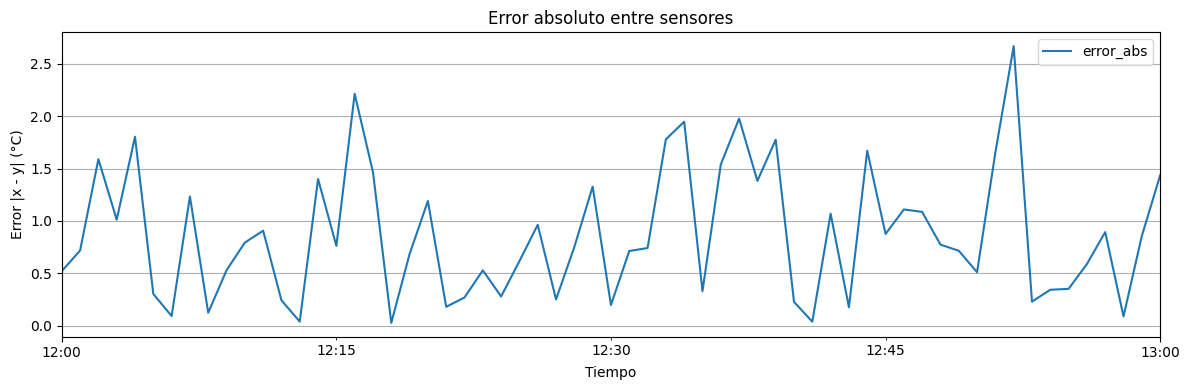

In [38]:
df_comparado.plot(x='timestamp', y='error_abs', figsize=(12, 4), title='Error absoluto entre sensores')
plt.xlabel("Tiempo")
plt.ylabel("Error |x - y| (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


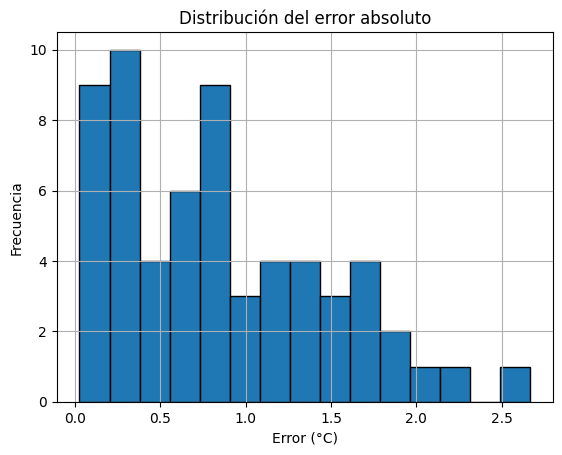

In [39]:
df_comparado['error_abs'].hist(bins=15, edgecolor='black')
plt.title("Distribución del error absoluto")
plt.xlabel("Error (°C)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


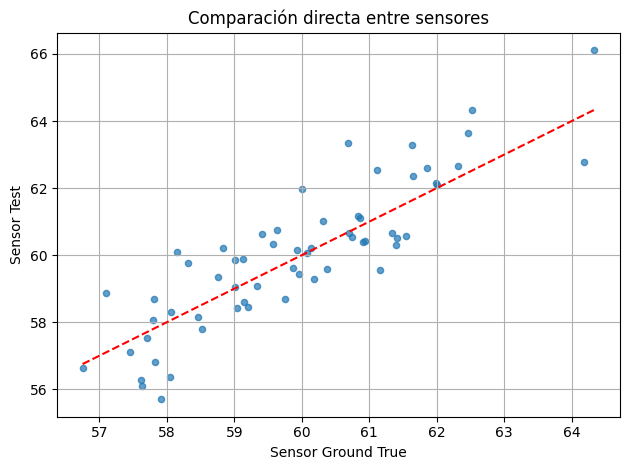

In [40]:
df_comparado.plot.scatter(x=col_x, y=col_y, alpha=0.7)
plt.title("Comparación directa entre sensores")
plt.xlabel("Sensor Ground True")
plt.ylabel("Sensor Test")
plt.grid(True)
plt.plot([df_comparado[col_x].min(), df_comparado[col_x].max()],
         [df_comparado[col_x].min(), df_comparado[col_x].max()], 'r--')  
plt.tight_layout()
plt.show()


In [41]:
correlacion = df_comparado[[col_x, col_y]].corr().iloc[0,1]
print(f"Correlación Pearson: {correlacion:.4f}")


Correlación Pearson: 0.8684
